In [1]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [2]:
from tensorflow import keras
keras.__version__

'2.4.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [12]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7329 - accuracy: 0.7600 - val_loss: 0.5027 - val_accuracy: 0.8344
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4925 - accuracy: 0.8287 - val_loss: 0.4451 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4442 - accuracy: 0.8453 - val_loss: 0.4195 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4173 - accuracy: 0.8548 - val_loss: 0.3956 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3962 - accuracy: 0.8616 - val_loss: 0.3924 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3803 - accuracy: 0.8677 - val_loss: 0.3660 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3672 - accuracy: 0.8712 - val_loss: 0.3597 - val_accuracy:

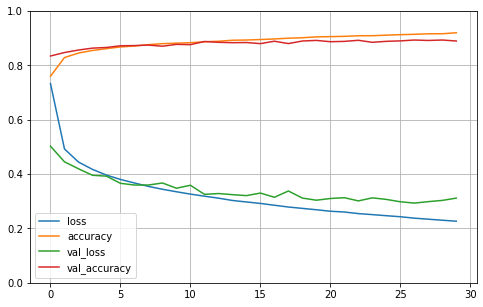

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 777us/step - loss: 0.3445 - accuracy: 0.8810


[0.34450921416282654, 0.8809999823570251]

In [18]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')

In [21]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 733us/step - loss: 0.7168 - val_loss: 0.4676
Epoch 2/20
363/363 [==============================] - 0s 573us/step - loss: 0.4946 - val_loss: 0.4163
Epoch 3/20
363/363 [==============================] - 0s 595us/step - loss: 0.4542 - val_loss: 0.3940
Epoch 4/20
363/363 [==============================] - 0s 579us/step - loss: 0.4333 - val_loss: 0.3927
Epoch 5/20
363/363 [==============================] - 0s 602us/step - loss: 0.4266 - val_loss: 0.3856
Epoch 6/20
363/363 [==============================] - 0s 593us/step - loss: 0.4161 - val_loss: 0.3783
Epoch 7/20
363/363 [==============================] - 0s 574us/step - loss: 0.4111 - val_loss: 0.3738
Epoch 8/20
363/363 [==============================] - 0s 541us/step - loss: 0.4142 - val_loss: 0.3750
Epoch 9/20
363/363 [==============================] - 0s 781us/step - loss: 0.4047 - val_loss: 0.3771
Epoch 10/20
363/363 [==============================] - 0s 647us/step - loss: 0.399

In [22]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 409us/step - loss: 0.3864


0.3863949477672577

In [23]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [24]:
y_pred

array([[2.6881852],
       [2.4219327],
       [1.9416167]], dtype=float32)

# Wide and deep network

In [4]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [6]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()